# 4.0 PREPARAÇÃO DE DADOS

In [3]:
# abrir a conexão com banco de dados
import sqlite3
import pandas as pd
conn = sqlite3.connect( "database.db" )

# AULA 03: ANALISE DE DADOS E PRIMEIROS INSIGHTS-PROJETO01

In [4]:
# agora UNINDO AS TABELAS através de uma coluna comun as duas tabelas" loyalty_number	 ""
# Consulta dos dados no banco de dados
consulta_atividade = """

  SELECT
    *
  FROM flight_activity fa LEFT JOIN flight_loyalty_history flh ON (fa.loyalty_number	 = flh.loyalty_number)


"""

df_atividade = pd.read_sql_query( consulta_atividade, conn )

# Confere abaixo se aparecer a tabela, ok deu certo
df_atividade.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,...,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,...,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,...,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


## Inspeção de Dados

In [5]:
# Python
# PALAVRA - CHAVE(ARGUMENTO)
# Identificando o tipo de variavel
type(df_atividade.head())



pandas.core.frame.DataFrame

In [6]:
# Numero de dados Faltantes
df_atividade.isna().sum()

loyalty_number                      0
year                                0
month                               0
flights_booked                      0
flights_with_companions             0
total_flights                       0
distance                            0
points_accumulated                  0
points_redeemed                     0
dollar_cost_points_redeemed         0
loyalty_number                      0
country                             0
province                            0
city                                0
postal_code                         0
gender                              0
education                           0
salary                         102672
marital_status                      0
loyalty_card                        0
clv                                 0
enrollment_type                     0
enrollment_year                     0
enrollment_month                    0
cancellation_year              355560
cancellation_month             355560
dtype: int64

In [7]:
# Veirificar o numero de linhas de uma planilha dados(dataframe)
df_atividade.shape[0]


405624

In [8]:
# Selecionar somente as colunas que contem numeros
# Veirificar o numero de colunas
df_atividade.shape[1]

26

In [9]:
# Selecionar somente as colunas que contem numeros
# Veirificar o panorama geral da planilha-Insights iniciaias
# Object = texto
df_atividade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               405624 non-null  int64  
 1   year                         405624 non-null  int64  
 2   month                        405624 non-null  int64  
 3   flights_booked               405624 non-null  int64  
 4   flights_with_companions      405624 non-null  int64  
 5   total_flights                405624 non-null  int64  
 6   distance                     405624 non-null  int64  
 7   points_accumulated           405624 non-null  float64
 8   points_redeemed              405624 non-null  int64  
 9   dollar_cost_points_redeemed  405624 non-null  int64  
 10  loyalty_number               405624 non-null  int64  
 11  country                      405624 non-null  object 
 12  province                     405624 non-null  object 
 13 

In [10]:
# df_atividade.loc[linhas, colunas]
df_atividade.loc[:, "distance"]

0         1521
1         2030
2         1200
3            0
4            0
          ... 
405619       0
405620       0
405621    1233
405622       0
405623       0
Name: distance, Length: 405624, dtype: int64

In [11]:
# soma da coluna distancia e apresenta a media
df_atividade.loc[:, "distance"].mean()


1208.880058872256

In [12]:
# soma da coluna distancia e tras max e min

menor_distancia = df_atividade.loc[:, "distance"].min()
maior_distancia = df_atividade.loc[:, "distance"].max()
media_distancia = df_atividade.loc[:, "distance"].mean()
soma_distancia = df_atividade.loc[:, "distance"].sum()

In [13]:
print(menor_distancia)
print(maior_distancia)
print(media_distancia)
print(soma_distancia)

0
6293
1208.880058872256
490350765


In [14]:
# exibe os valores nulos
df_atividade.isna()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,...,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,True
405620,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
405621,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
405622,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,True


In [15]:
# Selecionar somente as colunas que contem numeros
# Comando do Pandas para selecionar linhas e colunas
#df = df1.iloc[linhas, colunas]
# selecionando colunas de uma planilha

colunas = ['year', 'month', 'flights_booked', 'flights_with_companions',
'total_flights', 'distance', 'points_accumulated', 'salary', 'clv', 'loyalty_card']

df_dados_limpos = df_atividade.loc[:, colunas]

In [16]:
df_dados_limpos

,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,salary,clv,loyalty_card
0,2017,1,3,0,3,1521,152.0,92552.0,7919.20,Aurora
1,2017,1,10,4,14,2030,203.0,NaN,2887.74,Nova
2,2017,1,6,0,6,1200,120.0,NaN,2838.07,Nova
3,2017,1,0,0,0,0,0.0,63253.0,4170.57,Star
4,2017,1,0,0,0,0,0.0,91163.0,6622.05,Star
...,...,...,...,...,...,...,...,...,...,...
405619,2018,12,0,0,0,0,0.0,NaN,7290.07,Aurora
405620,2018,12,0,0,0,0,0.0,217943.0,8564.77,Nova
405621,2018,12,3,0,3,1233,123.0,47670.0,20266.50,Nova
405622,2018,12,0,0,0,0,0.0,NaN,2631.56,Star


In [17]:
# Selecionar somente as colunas que contem numeros
# Comando do Pandas para selecionar linhas e colunas
#df = df1.iloc[linhas, colunas]
# selecionando colunas de uma planilha

colunas = ['year', 'month', 'flights_booked', 'flights_with_companions',
'total_flights', 'distance', 'points_accumulated', 'salary', 'clv', 'loyalty_card']

df_colunas_numericas = df_atividade.loc[:, colunas]

In [18]:
df_colunas_numericas

,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,salary,clv,loyalty_card
0,2017,1,3,0,3,1521,152.0,92552.0,7919.20,Aurora
1,2017,1,10,4,14,2030,203.0,NaN,2887.74,Nova
2,2017,1,6,0,6,1200,120.0,NaN,2838.07,Nova
3,2017,1,0,0,0,0,0.0,63253.0,4170.57,Star
4,2017,1,0,0,0,0,0.0,91163.0,6622.05,Star
...,...,...,...,...,...,...,...,...,...,...
405619,2018,12,0,0,0,0,0.0,NaN,7290.07,Aurora
405620,2018,12,0,0,0,0,0.0,217943.0,8564.77,Nova
405621,2018,12,3,0,3,1233,123.0,47670.0,20266.50,Nova
405622,2018,12,0,0,0,0,0.0,NaN,2631.56,Star


In [19]:
# Remover as linhas com dados faltantes
df_dados_completos = df_colunas_numericas.dropna()

In [20]:
# Verifica se existe dados faltantes
df_dados_completos.isna().sum()

year                       0
month                      0
flights_booked             0
flights_with_companions    0
total_flights              0
distance                   0
points_accumulated         0
salary                     0
clv                        0
loyalty_card               0
dtype: int64

In [21]:
df_dados_completos.shape[0]

302952

# 5.0 Machine Learning

In [22]:
# importar biblioteca de Machine 'Tree"
# Importar biblioteca global e a Biblio interna

# dropna exclui as lnhas vazias, o drop() exclui uma coluna especifica

from sklearn import tree as tr
x_atributos = df_dados_completos.drop( columns="loyalty_card")
y_rotulos = df_dados_completos.loc[:, "loyalty_card"]


In [23]:
x_atributos.head()

,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,salary,clv
0,2017,1,3,0,3,1521,152.0,92552.0,7919.20
3,2017,1,0,0,0,0,0.0,63253.0,4170.57
4,2017,1,0,0,0,0,0.0,91163.0,6622.05
5,2017,1,0,0,0,0,0.0,70323.0,48356.96
6,2017,1,0,0,0,0,0.0,76849.0,5143.88


In [24]:
y_rotulos.head()

0    Aurora
3      Star
4      Star
5      Nova
6      Nova
Name: loyalty_card, dtype: object

In [25]:
# Definição do Algoritmo, observe que aqui = 2, é =dois niveis, ou pode aumentar esse parametro
modelo = tr.DecisionTreeClassifier(max_depth=6)

In [26]:
# Treinamento do Algoritmo (afit = ajuste)
  # modelo.fit(x_atributos, y_rotulos )
  # Observabdo acima, descrevendo os passageiros.
  # Abaixo o modelo basico sem grafico

modelo.fit(x_atributos, y_rotulos)


DecisionTreeClassifier(max_depth=6)

In [27]:
# Treinamento do Algoritmo (afit = ajuste)
  # modelo.fit(x_atributos, y_rotulos )
  # Observabdo acima, descrevendo os passageiros.
  # Agora modelo com Grafico arvore decisão

modelo_treinado = modelo.fit(x_atributos, y_rotulos)

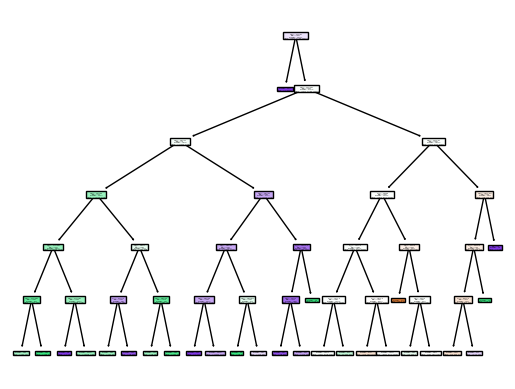

In [28]:
# aqui apresenta como 'arvore', o parametro filled é para ficar colorrido, e o ';' para omitir comentarios...
tr.plot_tree(modelo_treinado, filled = True);

# 6.0 Apresentando o resultado do algoritmo treinado

In [29]:
y_rotulos.head()

0    Aurora
3      Star
4      Star
5      Nova
6      Nova
Name: loyalty_card, dtype: object

In [ ]:
# Escolhendo uma linha-cliente aleatoriamente para faze a analise (atributo sample)
x_novo = x_atributos.sample()
print( x_novo )



In [ ]:
# Qual é a probabilidade da pessoa acima ter um dos tipos de cartão (aurora, Star, Noa) ?
modelo_treinado.predict_proba ( x_novo)

# o Resultado abaixo respeita uma ordem alfabetica = ( "Prob = Aurora: - Nova: - Star: ")

array([[0.        , 0.34615385, 0.65384615]])

In [31]:
# Qual é a probabilidade da pessoa acima ter um dos tipos de cartão (aurora, Star, Noa) ?
x_novo = x_atributos.sample()
previsao = modelo_treinado.predict_proba ( x_novo)

print( "Prob = Aurora: {:.2f}% - Nova: {:.2f}% - Star: {:.2f}%".format( 100*previsao[0] [0], 100*previsao[0][1], 100*previsao[0][2]))

Prob = Aurora: 33.04% - Nova: 33.86% - Star: 33.10%


# Painel de visualização

In [37]:
#Calcular o valor minimo da coluna para colocar no slide
x_atributos.loc[:, 'year'].min()

2017

In [38]:
#Calcular o valor maximo da coluna para colocar no slide
x_atributos.loc[:, 'year'].max()

2018

In [ ]:
!pip install gradio

In [43]:
import gradio as gr
import numpy as np

In [ ]:
def predict(*args):
  x_novo = np.array( [args] ).reshape(1, -1)
  previsao = modelo_treinado.predict_proba ( x_novo)

  return {"Aurora":previsao[0][0], "Nova":previsao[0][1], "Star":previsao[0][2]}




with gr.Blocks() as demo:
  # Titulo do painel
  gr.Markdown(""" # Propensao_de_compras """)

  with gr.Row():
    with gr.Column():
      gr.Markdown(""" # Atributos do Cliente """)
      year = gr.Slider(label='year', minimum=2017, maximum=2018, step=1, randomize=True)
      month = gr.Slider(label='month', minimum=1, maximum=12, step=1, randomize=True)
      flights_booked = gr.Slider(label='flights_booked', minimum=0, maximum=21, step=1, randomize=True)
      flights_with_companions = gr.Slider(label='flights_with_companions', minimum=0, maximum=11, step=1, randomize=True)
      total_flights = gr.Slider(label='total_flights', minimum=0, maximum=32, step=1, randomize=True)
      distance = gr.Slider(label='distance', minimum=0, maximum=6293, step=1, randomize=True)
      points_accumulated = gr.Slider(label='points_accumulated', minimum=0.00, maximum=676.50, step=0.1, randomize=True)
      salary = gr.Slider(label='salary', minimum=58486.00, maximum=407228.00, step=0.1, randomize=True)
      clv= gr.Slider(label='clv', minimum=2119.89, maximum=83325.38, step=1, randomize=True)

      with gr.Row():
        gr.Markdown(""" # PREVISÕES """)

      with gr.Row():
        gr.Markdown(""" # Botão de Previsão """)
        predict_btn = gr.Button( value="Previsao")


    with gr.Column():
      gr.Markdown(""" # Propensão de compra do Cliente """)
      label = gr.Label()

  # Botão Predict
  predict_btn.click(
      fn=predict,
      inputs=[
          year,
          month,
          flights_booked,
          flights_with_companions,
          total_flights,
          distance,
          points_accumulated,
          salary,
          clv,
          ],
      outputs=[label] )

demo.launch(debug=True, share=False)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X